In [166]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [167]:
# Data Importing and split
df = pd.read_csv("train.csv")

# Problem 1 : Predicting CentralAir using SalePrice

In [168]:
X = pd.DataFrame(df['SalePrice'])
y = pd.DataFrame(df['CentralAir'])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [169]:
# Size of training and test sets
print(f"Size of train data: {len(X_train)}")
print(f"Size of test data: {len(X_test)}")

Size of train data: 1168
Size of test data: 292


<AxesSubplot:xlabel='SalePrice', ylabel='CentralAir'>

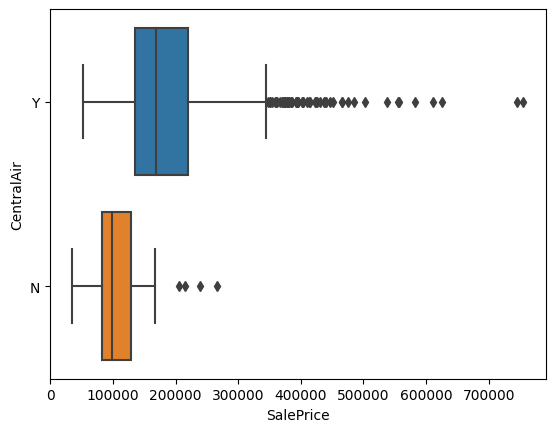

In [170]:
# Correlation between X, y
sns.boxplot(df, y='CentralAir', x='SalePrice')

There seems to be a correlation between SalePrice and CentralAir. Data with Central Air Conditioning (CentralAir == "Y") seem to have a higher SalePrice.

In [171]:
# Create a Decision Tree Classifier object
dectree_2 = DecisionTreeClassifier(max_depth = 2)
dectree_2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

[Text(0.5, 0.8333333333333334, 'SalePrice <= 107750.0\ngini = 0.132\nsamples = 1168\nvalue = [83, 1085]\nclass = Yes'),
 Text(0.25, 0.5, 'SalePrice <= 79450.0\ngini = 0.486\nsamples = 120\nvalue = [50, 70]\nclass = Yes'),
 Text(0.125, 0.16666666666666666, 'gini = 0.375\nsamples = 20\nvalue = [15, 5]\nclass = No'),
 Text(0.375, 0.16666666666666666, 'gini = 0.455\nsamples = 100\nvalue = [35, 65]\nclass = Yes'),
 Text(0.75, 0.5, 'SalePrice <= 137950.0\ngini = 0.061\nsamples = 1048\nvalue = [33, 1015]\nclass = Yes'),
 Text(0.625, 0.16666666666666666, 'gini = 0.175\nsamples = 237\nvalue = [23, 214]\nclass = Yes'),
 Text(0.875, 0.16666666666666666, 'gini = 0.024\nsamples = 811\nvalue = [10, 801]\nclass = Yes')]

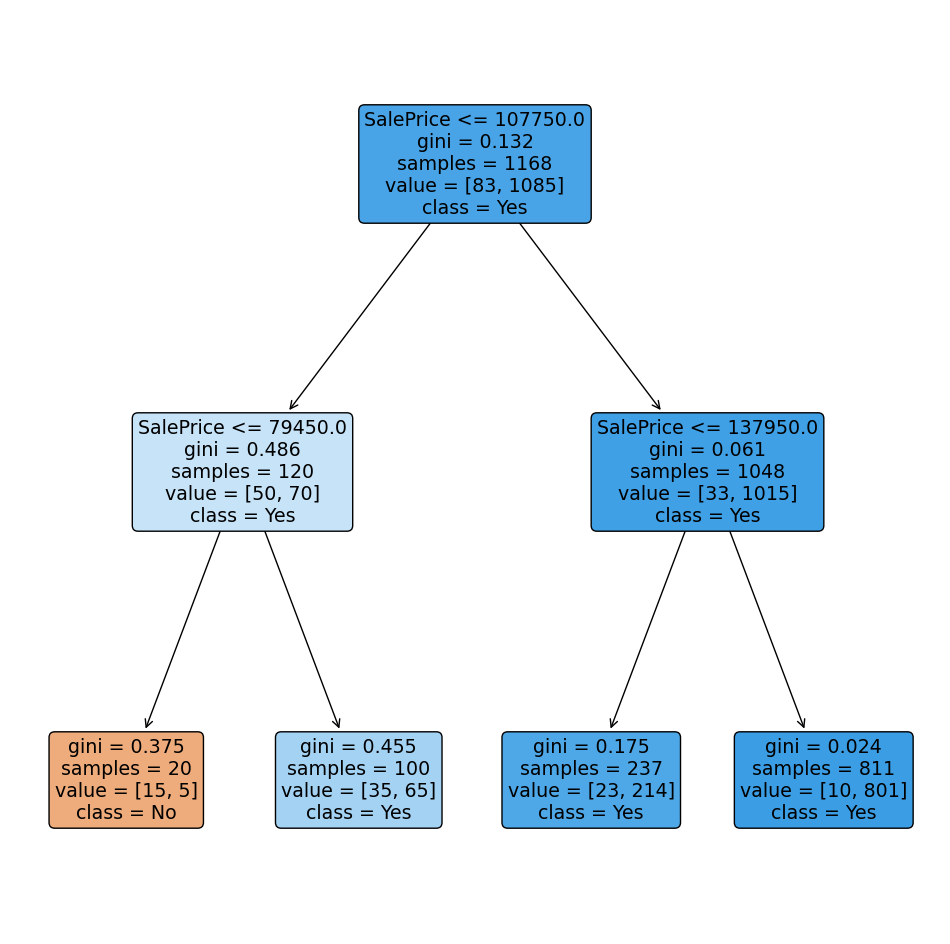

In [172]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(12,12))
plot_tree(dectree_2, filled=True, rounded=True, feature_names=["SalePrice"], class_names=["No", "Yes"])

In [173]:
# Create a Decision Tree Classifier object
dectree_4 = DecisionTreeClassifier(max_depth = 4)

dectree_4.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

[Text(0.48, 0.9, 'SalePrice <= 107750.0\ngini = 0.132\nsamples = 1168\nvalue = [83, 1085]\nclass = Yes'),
 Text(0.22, 0.7, 'SalePrice <= 79450.0\ngini = 0.486\nsamples = 120\nvalue = [50, 70]\nclass = Yes'),
 Text(0.08, 0.5, 'SalePrice <= 45650.0\ngini = 0.375\nsamples = 20\nvalue = [15, 5]\nclass = No'),
 Text(0.04, 0.3, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = No'),
 Text(0.12, 0.3, 'SalePrice <= 52250.0\ngini = 0.415\nsamples = 17\nvalue = [12, 5]\nclass = No'),
 Text(0.08, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Yes'),
 Text(0.16, 0.1, 'gini = 0.375\nsamples = 16\nvalue = [12, 4]\nclass = No'),
 Text(0.36, 0.5, 'SalePrice <= 106125.0\ngini = 0.455\nsamples = 100\nvalue = [35, 65]\nclass = Yes'),
 Text(0.28, 0.3, 'SalePrice <= 98150.0\ngini = 0.437\nsamples = 93\nvalue = [30, 63]\nclass = Yes'),
 Text(0.24, 0.1, 'gini = 0.476\nsamples = 64\nvalue = [25, 39]\nclass = Yes'),
 Text(0.32, 0.1, 'gini = 0.285\nsamples = 29\nvalue = [5, 24]\nclass = Yes'),
 Text(0.4

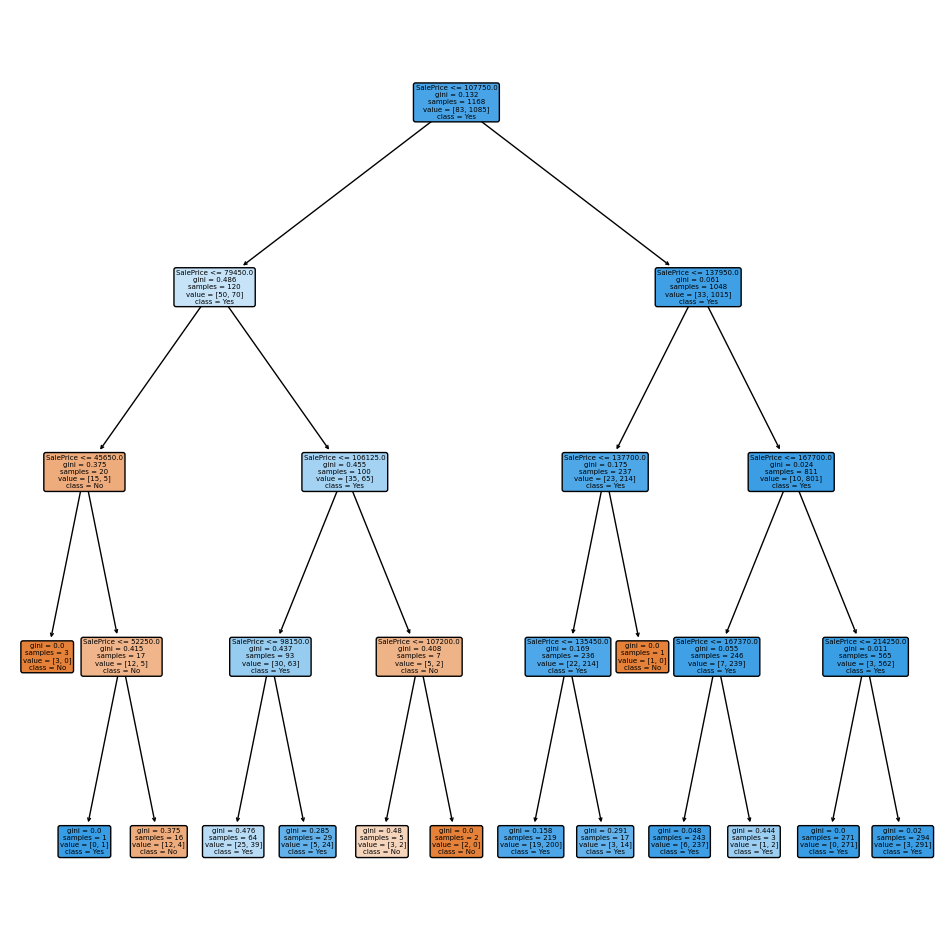

In [174]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(12,12))
plot_tree(dectree_4, filled=True, rounded=True, feature_names=["SalePrice"], class_names=["No","Yes"], fontsize=5)

In [175]:
# Predict Legendary corresponding to Total Train
y_train_pred = dectree_2.predict(X_train)
y_test_pred = dectree_2.predict(X_test)

In [176]:
from sklearn.metrics import confusion_matrix

<AxesSubplot:>

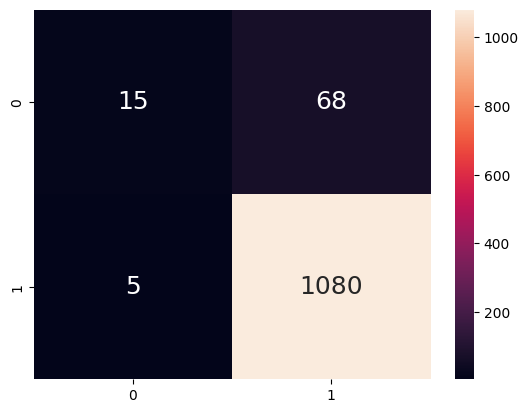

In [177]:
# Plot the two-way Confusion Matrix
cm = confusion_matrix(y_train, y_train_pred)
sns.heatmap(cm, annot = True, fmt=".0f", annot_kws={"size": 18})

In [178]:
# Print the Classification Accuracy
TP = cm[1][1]
FP = cm[0][1]
TN = cm[0][0]
FN = cm[1][0]

print("Metrics for Max Depth = 2 Tree on Train Set")
print()
print("Classification Accuracy:\t", dectree_2.score(X_train, y_train))
print("True Positive Rate:\t\t", TP/(FN + TP))
print("False Positive Rate:\t\t", FP/(FP + TN))

Metrics for Max Depth = 2 Tree on Train Set

Classification Accuracy:	 0.9375
True Positive Rate:		 0.9953917050691244
False Positive Rate:		 0.8192771084337349


<AxesSubplot:>

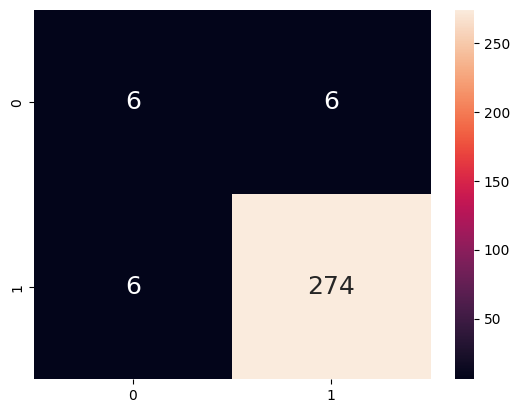

In [179]:
# Plot the two-way Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot = True, fmt=".0f", annot_kws={"size": 18})

In [180]:
# Print the Classification Accuracy
TP = cm[1][1]
FP = cm[0][1]
TN = cm[0][0]
FN = cm[1][0]

print("Metrics for Max Depth = 2 Tree on Test Set")
print()
print("Classification Accuracy:\t", dectree_2.score(X_test, y_test))
print("True Positive Rate:\t\t", TP/(FN + TP))
print("False Positive Rate:\t\t", FP/(FP + TN))

Metrics for Max Depth = 2 Tree on Test Set

Classification Accuracy:	 0.958904109589041
True Positive Rate:		 0.9785714285714285
False Positive Rate:		 0.5


In [181]:
# Predict Legendary corresponding to Total Test
y_train_pred = dectree_4.predict(X_train)
y_test_pred = dectree_4.predict(X_test)

<AxesSubplot:>

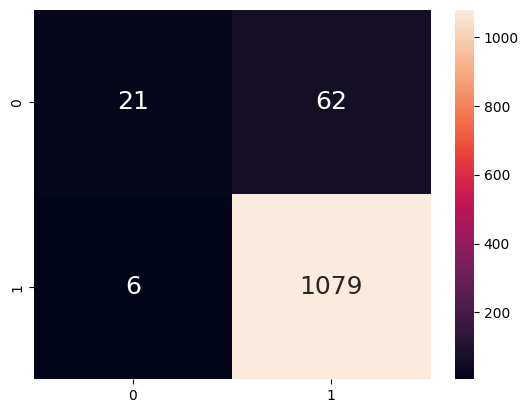

In [182]:
# Plot the two-way Confusion Matrix
cm = confusion_matrix(y_train, y_train_pred)
sns.heatmap(cm, annot = True, fmt=".0f", annot_kws={"size": 18})

In [183]:
# Print the Classification Accuracy
TP = cm[1][1]
FP = cm[0][1]
TN = cm[0][0]
FN = cm[1][0]

print("Metrics for Max Depth = 4 tree on Train Set")
print()
print("Classification Accuracy:\t", dectree_4.score(X_train, y_train))
print("True Positive Rate:\t\t", TP/(FN + TP))
print("False Positive Rate:\t\t", FP/(FP + TN))

Metrics for Max Depth = 4 tree on Train Set

Classification Accuracy:	 0.9417808219178082
True Positive Rate:		 0.9944700460829493
False Positive Rate:		 0.7469879518072289


<AxesSubplot:>

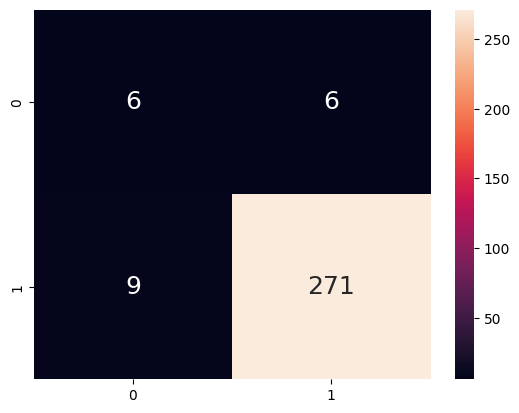

In [184]:
# Plot the two-way Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot = True, fmt=".0f", annot_kws={"size": 18})

In [185]:
# Print the Classification Accuracy
TP = cm[1][1]
FP = cm[0][1]
TN = cm[0][0]
FN = cm[1][0]

print("Metrics for Max Depth = 4 tree on Test Set")
print()
print("Classification Accuracy:\t", dectree_4.score(X_test, y_test))
print("True Positive Rate:\t\t", TP/(FN + TP))
print("False Positive Rate:\t\t", FP/(FP + TN))

Metrics for Max Depth = 4 tree on Test Set

Classification Accuracy:	 0.9486301369863014
True Positive Rate:		 0.9678571428571429
False Positive Rate:		 0.5


### Final Metrics

| Metric | Max Depth = 2 | Max Depth = 4 |
| :----: | :-----------: | :-----------: |
| Classification Accuracy (Train) | 0.9375              | 0.9417808219178082
| True Positive Rate (Train)      | 0.9953917050691244  | 0.9944700460829493
| False Positive Rate (Train)     | 0.8192771084337349  | 0.7469879518072289
| Classification Accuracy (Test)  | 0.958904109589041   | 0.9486301369863014
| True Positive Rate (Test)       | 0.9785714285714285  | 0.9678571428571429
| False Positive Rate (Test)      | 0.5                 | 0.5

The Second Model (Max Depth = 4) is better. The Classification Accuracy and True Positive Rate on the Train set, as well as the Classification Accuracy, True Positive Rate and False Positive Rate on the Test set are relatively similar for both models. However, the False Positive Rate for the Model with Max Depth = 4 (0.747) is significantly lower than the False Positive Rate for the Model with Max Depth = 2 (0.819), demonstrating that the model with Max Depth = 4 is able to better predict data with a lower proportion of false positives. Hence, the second model (Max Depth = 4) is better.

Additionally, the classification accuracy for the model with Max Depth = 2 is higher for the test set, while that for the train set is lower. This indicates that the model is able to perform better with external data that it is not being trained on, and hence in this scenario even though the classification accuracies have contrasting results, the classification accuracy on the test set could be more appropriate in this scenario, and hence indicates that the second model with Max Depth = 4 is better (test classification accuracy of 0.958904109589041 vs 0.9486301369863014).

# Problem 2 : Predicting CentralAir using Other Variables

In [208]:
def classification(var):
  X = pd.DataFrame(df[var])
  y = pd.DataFrame(df['CentralAir'])

  X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

  # Create a Decision Tree Classifier object
  dectree = DecisionTreeClassifier(max_depth = 4)

  dectree.fit(X_train, y_train)

  f, axes = plt.subplots(3, figsize=(12, 12))
  plot_tree(dectree, filled=True, rounded=True, feature_names=["CentralAir"], class_names=["No","Yes"],ax=axes[0])

  # Predict Legendary corresponding to Total Train
  y_train_pred = dectree.predict(X_train)

  # Plot the two-way Confusion Matrix
  cm = confusion_matrix(y_train, y_train_pred)
  sns.heatmap(cm, annot = True, fmt=".0f", annot_kws={"size": 18}, ax=axes[1]).set(title="Train")

  # Print the Classification Accuracy
  TP = cm[1][1]
  FP = cm[0][1]
  TN = cm[0][0]
  FN = cm[1][0]
  print("Train")
  print("Classification Accuracy:", dectree.score(X_train, y_train))
  print("True Positive Rate: ", TP/(FN + TP))
  print("False Positive Rate: ", FP/(FP + TN))

  print("------------------------")
  # Predict Legendary corresponding to Total Train
  y_test_pred = dectree.predict(X_test)

  # Plot the two-way Confusion Matrix
  cm = confusion_matrix(y_test, y_test_pred)
  sns.heatmap(cm, annot = True, fmt=".0f", annot_kws={"size": 18}, ax=axes[2]).set(title="Test")

  # Print the Classification Accuracy
  TP = cm[1][1]
  FP = cm[0][1]
  TN = cm[0][0]
  FN = cm[1][0]

  print("Test")
  print("Classification Accuracy:", dectree.score(X_test, y_test))
  print("True Positive Rate: ", TP/(FN + TP))
  print("False Positive Rate: ", FP/(FP + TN))

Train
Classification Accuracy: 0.9315068493150684
True Positive Rate:  0.992626728110599
False Positive Rate:  0.8674698795180723
------------------------
Test
Classification Accuracy: 0.9726027397260274
True Positive Rate:  0.9964285714285714
False Positive Rate:  0.5833333333333334


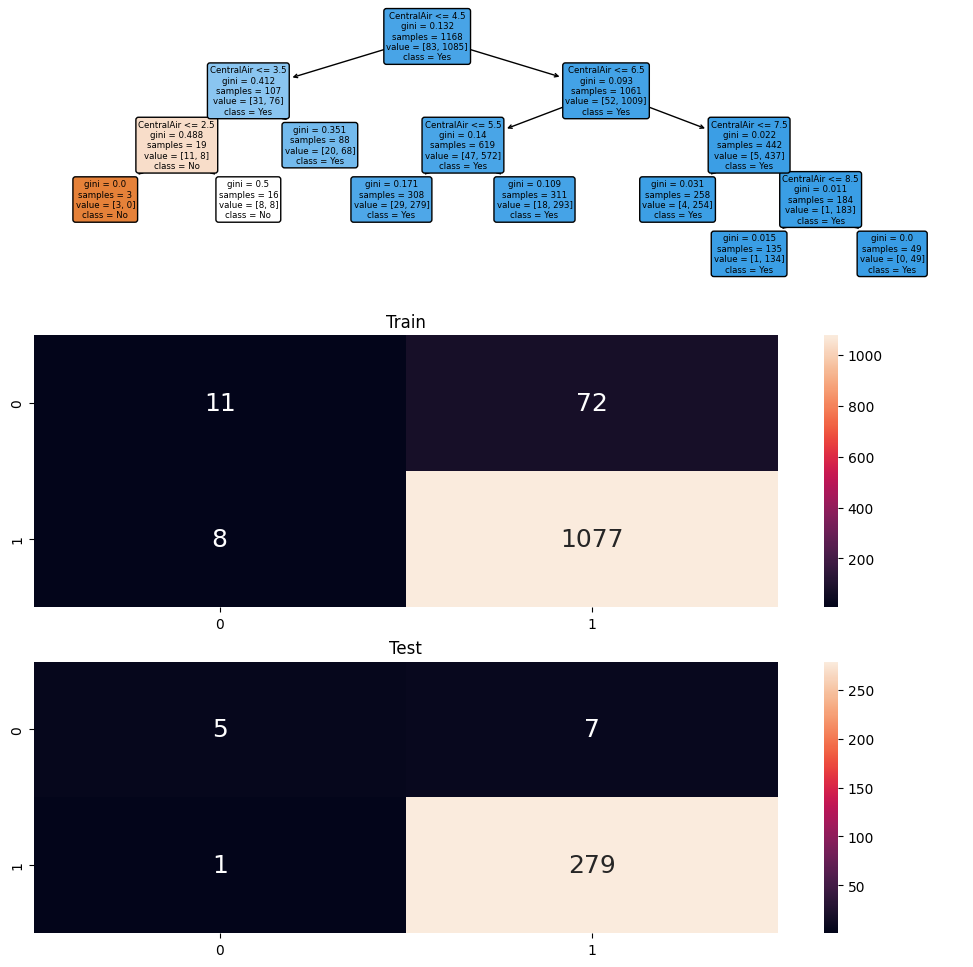

In [210]:
classification("OverallQual")

Train
Classification Accuracy: 0.9306506849315068
True Positive Rate:  1.0
False Positive Rate:  0.9759036144578314
------------------------
Test
Classification Accuracy: 0.958904109589041
True Positive Rate:  1.0
False Positive Rate:  1.0


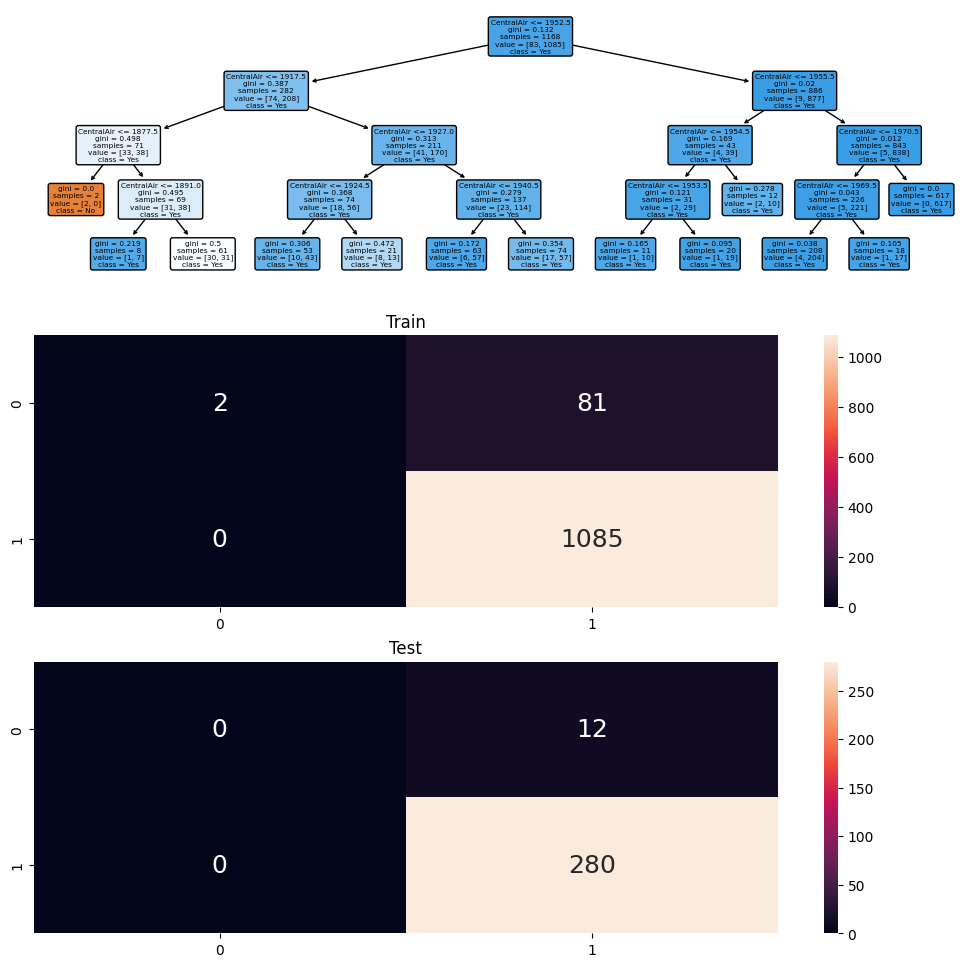

In [211]:
classification("YearBuilt")

### Final Metrics

| Metric | OverallQual | YearBuilt |
| :----: | :-----------: | :-----------: |
| Classification Accuracy (Train) | 0.9315068493150684  | 0.9306506849315068
| True Positive Rate (Train)      | 0.992626728110599   | 1.0
| False Positive Rate (Train)     | 0.8674698795180723  | 0.9759036144578314
| Classification Accuracy (Test)  | 0.9726027397260274  | 0.958904109589041
| True Positive Rate (Test)       | 0.9964285714285714  | 1.0
| False Positive Rate (Test)      | 0.5833333333333334  | 1.0

The OverallQual model is better. On both the Training and Test sets, the classification accuracy for the OverallQual model is higher and the False Positive Rate is lower, while the True Positive Rate is only slightly lower. 

In this scenario, the True Positive Rate might not be a suitable metric for comparison, as for both the train and test sets, the YearBuilt model predicted an extremely low number of Negatives, which reduced the number of False Negatives, and hence bumped up the True Positive Rate of the model.

# Problem 3 : Understanding the Misclassified Samples

[Text(0.48, 0.9, 'SalePrice <= 107750.0\ngini = 0.132\nsamples = 1168\nvalue = [83, 1085]\nclass = Yes'),
 Text(0.22, 0.7, 'SalePrice <= 79450.0\ngini = 0.486\nsamples = 120\nvalue = [50, 70]\nclass = Yes'),
 Text(0.08, 0.5, 'SalePrice <= 45650.0\ngini = 0.375\nsamples = 20\nvalue = [15, 5]\nclass = No'),
 Text(0.04, 0.3, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = No'),
 Text(0.12, 0.3, 'SalePrice <= 52250.0\ngini = 0.415\nsamples = 17\nvalue = [12, 5]\nclass = No'),
 Text(0.08, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Yes'),
 Text(0.16, 0.1, 'gini = 0.375\nsamples = 16\nvalue = [12, 4]\nclass = No'),
 Text(0.36, 0.5, 'SalePrice <= 106125.0\ngini = 0.455\nsamples = 100\nvalue = [35, 65]\nclass = Yes'),
 Text(0.28, 0.3, 'SalePrice <= 98150.0\ngini = 0.437\nsamples = 93\nvalue = [30, 63]\nclass = Yes'),
 Text(0.24, 0.1, 'gini = 0.476\nsamples = 64\nvalue = [25, 39]\nclass = Yes'),
 Text(0.32, 0.1, 'gini = 0.285\nsamples = 29\nvalue = [5, 24]\nclass = Yes'),
 Text(0.4

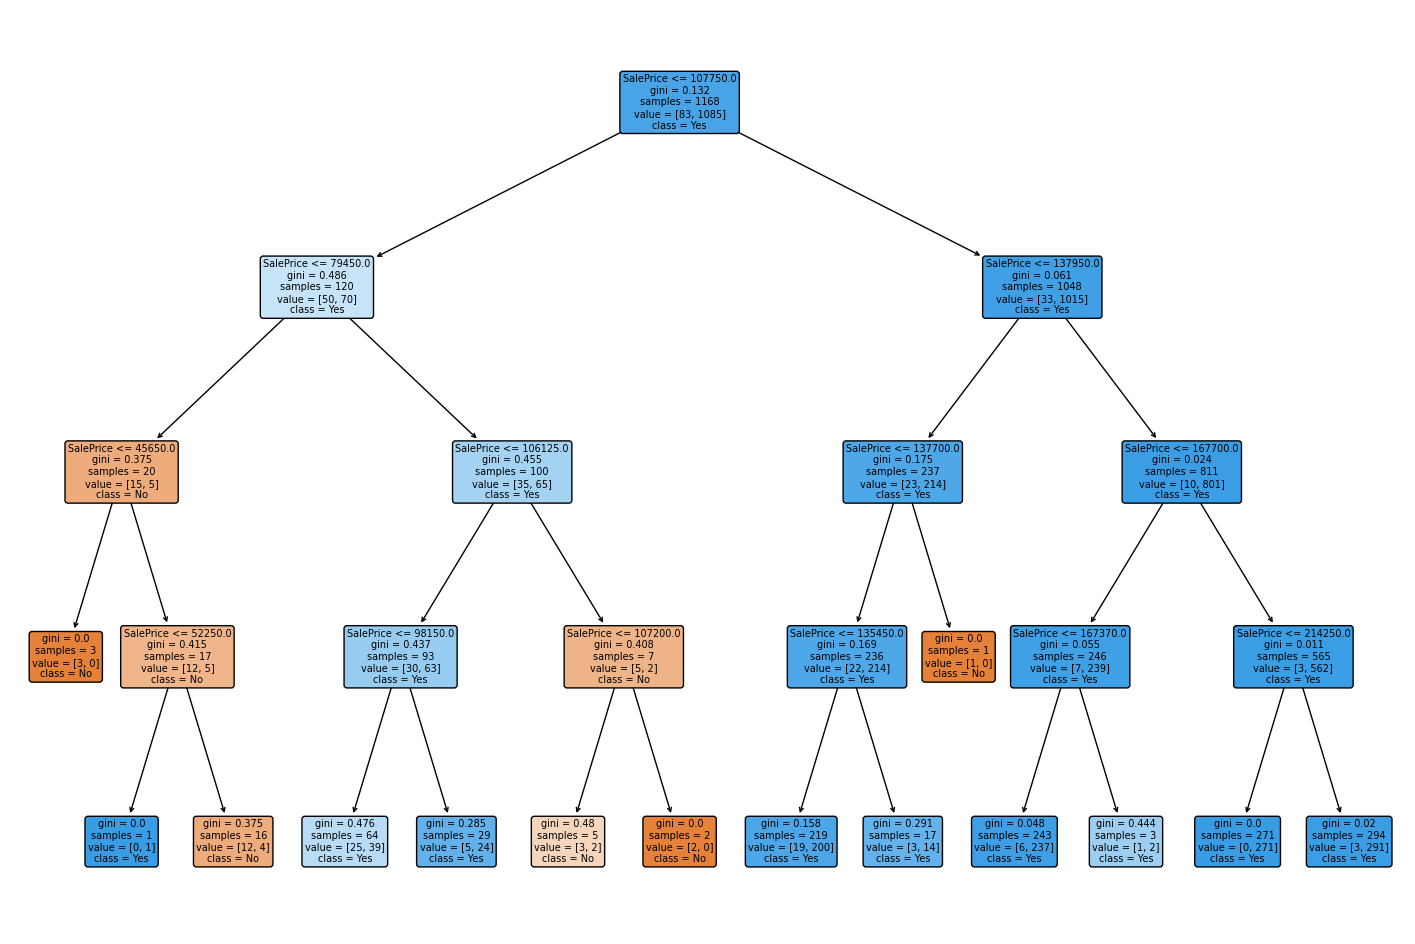

In [189]:
f = plt.figure(figsize=(18,12))
plot_tree(dectree_4, filled=True, rounded=True, feature_names=["SalePrice"], class_names=["No","Yes"], fontsize=7)

3rd Leaf Node from the left has the highest number of False Positives (25). Condition for this leaf is `SalePrice > 79450 and SalePrice <= 98150`

In [190]:
# Retrieve indexes of leaf node
indexes = X_train[(X_train["SalePrice"] > 79450) & (X_train["SalePrice"] <= 98150)].index

print(f"Number of samples: {len(indexes)}")
print(f"Indexes: {indexes}")

Number of samples: 64
Indexes: Int64Index([ 638,  514,  342,  210, 1137,  430, 1323, 1013,  438,  308,  352,
             287,   88, 1376,  325,   39, 1035,  976,  307,   97,  434, 1007,
             235, 1179,  676,  223, 1022, 1453, 1144, 1000,  386,  637,  125,
            1412,  912, 1219,  750,   68,   75,  232,  341, 1090,  456, 1039,
             431,  696,  655,  935, 1062,  489,   17,  127, 1218, 1072,  658,
             749, 1186,  821, 1143, 1378,  632, 1038,   98, 1086],
           dtype='int64')


In [191]:
# Samples from the dataframe that ended up in the leaf node
df.loc[indexes]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
638,639,30,RL,67.0,8777,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,5,2008,WD,Normal,85000
514,515,45,RL,55.0,10594,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2007,WD,Normal,96500
342,343,90,RL,NaN,8544,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,87500
210,211,30,RL,67.0,5604,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Normal,98000
1137,1138,50,RL,54.0,6342,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,94000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1378,1379,160,RM,21.0,1953,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,83000
632,633,20,RL,85.0,11900,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2009,WD,Family,82500
1038,1039,160,RM,21.0,1533,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,97000
98,99,30,RL,85.0,10625,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,Shed,400,5,2010,COD,Abnorml,83000


In [199]:
# Printing just the SalePrice and CentralAir columns
df.loc[indexes, ["SalePrice", "CentralAir"]]

,SalePrice,CentralAir
638,85000,Y
514,96500,N
342,87500,N
210,98000,N
1137,94000,N
...,...,...
1378,83000,Y
632,82500,Y
1038,97000,Y
98,83000,N


In [204]:
# False Positive Cases
misclassified_df = df.loc[indexes]
misclassified_df[misclassified_df['CentralAir'] == "N"]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
514,515,45,RL,55.0,10594,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2007,WD,Normal,96500
342,343,90,RL,NaN,8544,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,87500
210,211,30,RL,67.0,5604,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Normal,98000
1137,1138,50,RL,54.0,6342,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,94000
1013,1014,30,RM,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,85000
438,439,30,RL,40.0,4280,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2007,WD,Normal,90350
352,353,50,RL,60.0,9084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2008,ConLw,Normal,95000
88,89,50,C (all),105.0,8470,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,10,2009,ConLD,Abnorml,85000
1376,1377,30,RL,52.0,6292,Pave,NaN,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Normal,91000
325,326,45,RM,50.0,5000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2007,WD,Normal,87000


In [206]:
# Printing out the SalePrice and CentralAir columns
misclassified_df[misclassified_df['CentralAir'] == "N"][["SalePrice", "CentralAir"]]

,SalePrice,CentralAir
514,96500,N
342,87500,N
210,98000,N
1137,94000,N
1013,85000,N
438,90350,N
352,95000,N
88,85000,N
1376,91000,N
325,87000,N
